## Foundations: Clean Data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

![Clean Data](../../img/clean_data.png)

### Read in Data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline




#matplotlib is used for the interactive plotting of the dataset
#NumPy can be used to perform a wide variety of mathematical operations on arrays
#pandas is used for the manupulation with the dataset
#Seaborn is a library for making statistical graphics in Python. 




titanic = pd.read_csv('titanic.csv')
titanic.head(10)



#we with this project what we want is to predict the survival rate based 
#on the number of variable we have in our dataset 
#Data wrangling and manupulation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
%pwd

'C:\\Users\\mr22039'

In [ ]:
#In this dataset what are we are going to be predict if the person is 
#survived or not
#so the survided section is the prediction class of the datset and the 
#other variable are the feautre class of the variable


### Clean continuous variables

#### Fill missing for `Age`

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#now we are going to fill the missing values in out dataset
#we will start by filling the missing values in the age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch`

<Figure size 432x288 with 0 Axes>

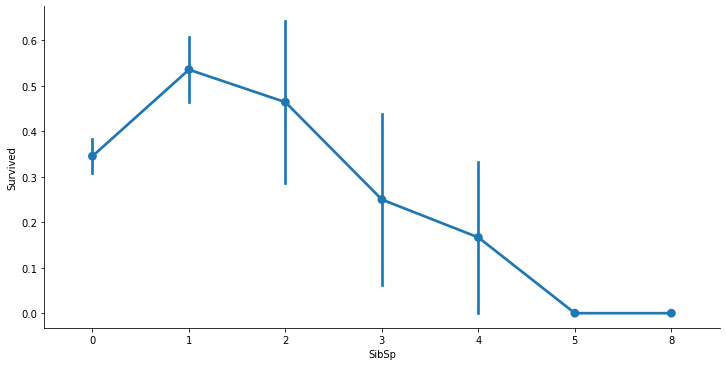

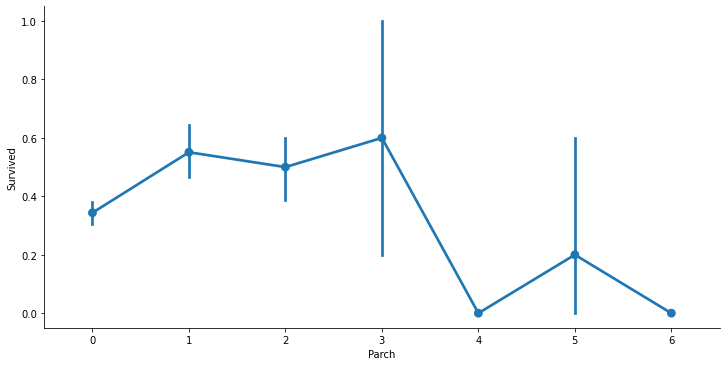

In [14]:
#SibSp (int) - Number of siblings and spouses aboard
#Parch (int) - Number of parents and children aboard

#so insted of writing the code for the two variable what we have done is 
#we have written a for loop to find out the chart of two graph , so insted 
#of typing the code agin for both the graph we have just made the code out it

'''
#a common method to plot the multiple column
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)

'''



for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [18]:
#with the above visualiztion we can see that there is the pattern between the 
# Number of siblings and spouses aboard and the 
#Number of parents and children aboard
#so we will add them in the new dataset called as the family count
titanic['Family_cnt']= titanic['SibSp'] + titanic['Parch']

#lets look at the head of out new dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Drop unnnecessary variables

In [19]:
#with this variable we will try to remove some unnecessary columns from our dataset
#that are of no use in the dataset
titanic.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [20]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [21]:
#finding out the missing values in the dataset , as we have already cleaned the 
#age variable with the help of mean values
titanic.isnull().sum()

#after watching the results we can see that cabin variable still have some of the
#na's values left in it.

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [22]:
#now we are going to find out the survival rate with respect ot the cabin column 
#if it missing or not,and how much percentage of survival rate we are getting wnen 
#it is missing and when it is not missing

#it is good to remember that the survival class is the categorical dataset with 0 and 1
#whereas the cabin class has the multiple categorical values in it
#but what we are doing here is to find out it on the basis of categorical dataset
#if it is missing or not

titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

#interpreting the results
# so false means those who have the cabin
# so true means those who dosen't have the cabin

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [25]:
#now we were going to made an another column which is going to tell us where 
#there is cabin with respect to its survival rate and where there cabin is not missing
#with respect to its survival rate

#we will going to use the numpy library
titanic['Cabin_int'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [26]:
#finding out the changes in our dataset
titanic.head()

#so what we have done is we have converted the cabin missing values data into the
#numerical dataset of categories

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_int
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#### Convert `Sex` to numeric

In [30]:
#converting the categorical dataset into the numeric one with the help of 
#dictionary in the python

#so we have definded the variable that we need to convert 
gender_num = {'male': 0, 'female': 1}

#now we were going to implement it into the dataframe with the help of @map function
titanic['Sex'] = titanic['Sex'].map(gender_num) 

In [31]:
#viewing the change in the dataset
titanic.head(5)

#so here we can see the sex variable has changed into the categorical form

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_int
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


 Drop unnecessary variables

In [32]:
#so here we dropping some variable that are not relevant to the model and 
# from some of them we have already exptracted the value
# and some are just the identifyiers in our dataset
#we use axis =1 to drop the variable out of column

titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

### Write out cleaned data

In [36]:
#titanic.csv('../../../titanic_cleaned.csv', index=False)

In [35]:
#this the write way to transfer the cleaned dataset from you juypter notepbook to the directory in your computer 
titanic.to_csv('titanic_cleaned.csv')

In [ ]:
#so our data manupulation is finished